In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

In [2]:
# Store filepath in a variable
OPTN_data = Path("Resources/cleaned_OPTN_data.csv")

# read the file - AP
kidney_data = pd.read_csv(OPTN_data)

kidney_data.head()

,State,Total,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years,Payment type,Blood type,Age,Ethnicity,Sex
0,Alabama,455,9,22,61,101,146,73,54,40,NaN,NaN,NaN,NaN,Female
1,Alabama,713,16,38,87,150,237,135,95,43,NaN,NaN,NaN,NaN,Male
2,Alabama,787,5,7,72,169,267,146,97,48,Public insurance - Medicare FFS (Fee for Service),NaN,NaN,NaN,NaN
3,Alabama,688,9,32,88,154,215,122,93,57,NaN,NaN,NaN,"Black, Non-Hispanic",NaN
4,Alabama,631,14,30,80,136,209,124,81,46,NaN,O,NaN,NaN,NaN


In [3]:
# ignoring commas

kidney_data["Total"] = kidney_data["Total"].str.replace(",", "")
kidney_data["< 30 days"] = kidney_data["< 30 days"].str.replace(",", "")
kidney_data["30 to < 90 days"] = kidney_data["30 to < 90 days"].str.replace(",", "")
kidney_data["90 days to < 6 months"] = kidney_data["90 days to < 6 months"].str.replace(",", "")
kidney_data["6 months to < 1 year"] = kidney_data["6 months to < 1 year"].str.replace(",", "")
kidney_data["1 year to < 2 years"] = kidney_data["1 year to < 2 years"].str.replace(",", "")
kidney_data["2 years to < 3 years"] = kidney_data["2 years to < 3 years"].str.replace(",", "")
kidney_data["3 years to < 5 years"] = kidney_data["3 years to < 5 years"].str.replace(",", "")
kidney_data["> 5 years"] = kidney_data["> 5 years"].str.replace(",", "")

In [4]:
# need to type total and wait time columns as integers
kidney_data["Total"] = kidney_data["Total"].astype(int)
kidney_data["< 30 days"] = kidney_data["< 30 days"].astype(int)
kidney_data["30 to < 90 days"] = kidney_data["30 to < 90 days"].astype(int)
kidney_data["90 days to < 6 months"] = kidney_data["90 days to < 6 months"].astype(int)
kidney_data["6 months to < 1 year"] = kidney_data["6 months to < 1 year"].astype(int)
kidney_data["1 year to < 2 years"] = kidney_data["1 year to < 2 years"].astype(int)
kidney_data["2 years to < 3 years"] = kidney_data["2 years to < 3 years"].astype(int)
kidney_data["3 years to < 5 years"] = kidney_data["3 years to < 5 years"].astype(int)
kidney_data["> 5 years"] = kidney_data["> 5 years"].astype(int)

In [5]:
# testing
# variable = kidney_data.loc[(kidney_data["Sex"] == "Female") & (kidney_data["State"] == "Oklahoma"), "Total"].values[0]
# variable

# Oklahoma

In [18]:
# Total candidates for Oklahoma

ok_totals1 = kidney_data.loc[kidney_data["State"] == "Oklahoma"]
ok_male_totals = ok_totals1.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_female_totals = ok_totals1.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]
ok_totals = ok_male_totals + ok_female_totals
ok_totals

597

## Wait time by blood type in Oklahoma

In [7]:
# Total for each blood type in Oklahoma

ok_blood_type_O = ok_totals1.loc[ok_totals1["Blood type"] == "O"]["Total"].values[0]
ok_blood_type_A = ok_totals1.loc[ok_totals1["Blood type"] == "A"]["Total"].values[0]
ok_blood_type_B = ok_totals1.loc[ok_totals1["Blood type"] == "B"]["Total"].values[0]
ok_blood_type_AB = ok_totals1.loc[ok_totals1["Blood type"] == "AB"]["Total"].values[0]
print(ok_blood_type_O)
print(ok_blood_type_A)
print(ok_blood_type_B)
print(ok_blood_type_AB)

341
188
65
3


In [9]:
# Creating blood type vs wait time dataframe for Oklahoma

ok_blood_type_wait = pd.DataFrame(ok_totals1[["Blood type","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_blood_type_wait

,Blood type,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1067,O,16,24,39,64,82,70,48,15
1071,A,14,15,21,46,47,25,15,7
1078,B,3,9,7,13,13,8,9,5
1088,AB,0,0,1,0,1,1,0,0


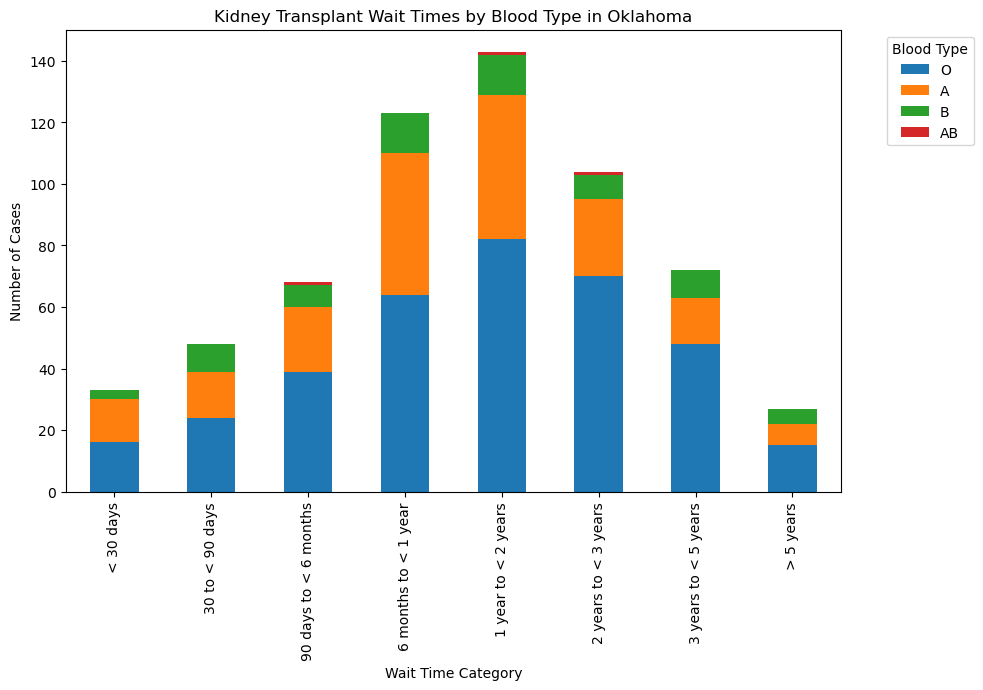

In [14]:
# Plot above on bar chart

# Set Blood type as the index
ok_blood_data = ok_blood_type_wait.set_index("Blood type")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
ok_blood_data = ok_blood_data.transpose()

# Plot the bar chart
ok_blood_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Blood Type in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Blood Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Summary statistics


In [ ]:
# Hypothesis testing

## Wait time by sex in Oklahoma

In [15]:
# Oklahoma total for each sex

ok_sex_male = ok_totals1.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_sex_female = ok_totals1.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]

print(ok_sex_male)
print(ok_sex_female)

381
216


In [16]:
# Creating sex vs wait time dataframe for Oklahoma

ok_sex_wait = pd.DataFrame(ok_totals1[["Sex","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_sex_wait

,Sex,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1065,Female,10,17,25,45,43,39,32,11
1066,Male,23,31,43,78,100,65,40,16


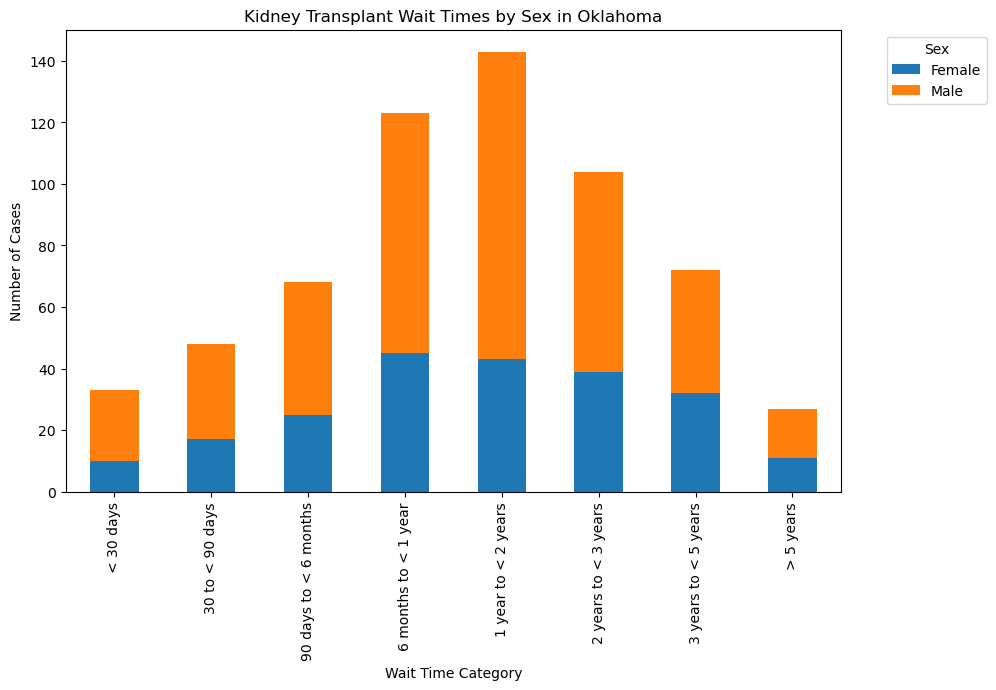

In [17]:
# Plot above on a bar chart
# Set Blood type as the index
ok_sex_data = ok_sex_wait.set_index("Sex")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
ok_sex_data = ok_sex_data.transpose()

# Plot the bar chart
ok_sex_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Sex in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Sex", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Summary statistics


In [ ]:
# Hypothesis testing

## Wait time by payment type in Oklahoma

In [27]:
# Total for each payment type in Oklahoma

# Total of totals = 605 which is more than the 597 total Oklahoma candidates? Was getting errors on H - O due to payment
#   types not existing for Oklahoma

ok_payment_type_A = ok_totals1.loc[ok_totals1["Payment type"] == "Private insurance"]["Total"].values[0]
ok_payment_type_B = ok_totals1.loc[ok_totals1["Payment type"] == "Public insurance - Medicare FFS (Fee for Service)"]["Total"].values[0]
ok_payment_type_C = ok_totals1.loc[ok_totals1["Payment type"] == "Public insurance - Medicare & Choice"]["Total"].values[0]
ok_payment_type_D = ok_totals1.loc[ok_totals1["Payment type"] == "Public insurance - Medicaid"]["Total"].values[0]
ok_payment_type_E = ok_totals1.loc[ok_totals1["Payment type"] == "Unknown"]["Total"].values[0]
ok_payment_type_F = ok_totals1.loc[ok_totals1["Payment type"] == "Public insurance - Department of VA"]["Total"].values[0]
ok_payment_type_G = ok_totals1.loc[ok_totals1["Payment type"] == "Public insurance - Other government"]["Total"].values[0]
#ok_payment_type_H = ok_totals1.loc[ok_totals1["Payment type"] == "Pending"]["Total"].values[0]
#ok_payment_type_I = ok_totals1.loc[ok_totals1["Payment type"] == "Public insurance - CHIP (Children's Health Insurance Program)"]["Total"].values[0]
#ok_payment_type_J = ok_totals1.loc[ok_totals1["Payment type"] == "Self"]["Total"].values[0]
#ok_payment_type_K = ok_totals1.loc[ok_totals1["Payment type"] == "Public insurance - Medicare Unspecified"]["Total"].values[0]
#ok_payment_type_L = ok_totals1.loc[ok_totals1["Payment type"] == "Foreign Government Specify"]["Total"].values[0]
#ok_payment_type_M = ok_totals1.loc[ok_totals1["Payment type"] == "Donation"]["Total"].values[0]
#ok_payment_type_N = ok_totals1.loc[ok_totals1["Payment type"] == "Free Care"]["Total"].values[0]
#ok_payment_type_O = ok_totals1.loc[ok_totals1["Payment type"] == "US/State Govt Agency"]["Total"].values[0]
print(ok_payment_type_A)
print(ok_payment_type_B)
print(ok_payment_type_C)
print(ok_payment_type_D)
print(ok_payment_type_E)
print(ok_payment_type_F)
print(ok_payment_type_G)
#print(ok_payment_type_H)
#print(ok_payment_type_I)
#print(ok_payment_type_J)
#print(ok_payment_type_K)
#print(ok_payment_type_L)
#print(ok_payment_type_M)
#print(ok_payment_type_N)
#print(ok_payment_type_O)

280
96
164
43
2
17
3


In [29]:
# Creating payment type vs wait time dataframe

ok_payment_wait = pd.DataFrame(ok_totals1[["Payment type","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_payment_wait

,Payment type,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1069,Private insurance,18,28,22,59,62,51,35,14
1072,Public insurance - Medicare & Choice,6,11,24,34,45,31,14,0
1076,Public insurance - Medicare FFS (Fee for Service),6,5,10,16,19,10,18,12
1081,Public insurance - Medicaid,1,3,8,10,11,8,2,0
1084,Public insurance - Department of VA,1,1,4,3,6,2,3,1
1087,Public insurance - Other government,0,0,0,1,0,2,0,0
1089,Unknown,2,0,0,0,0,0,0,0


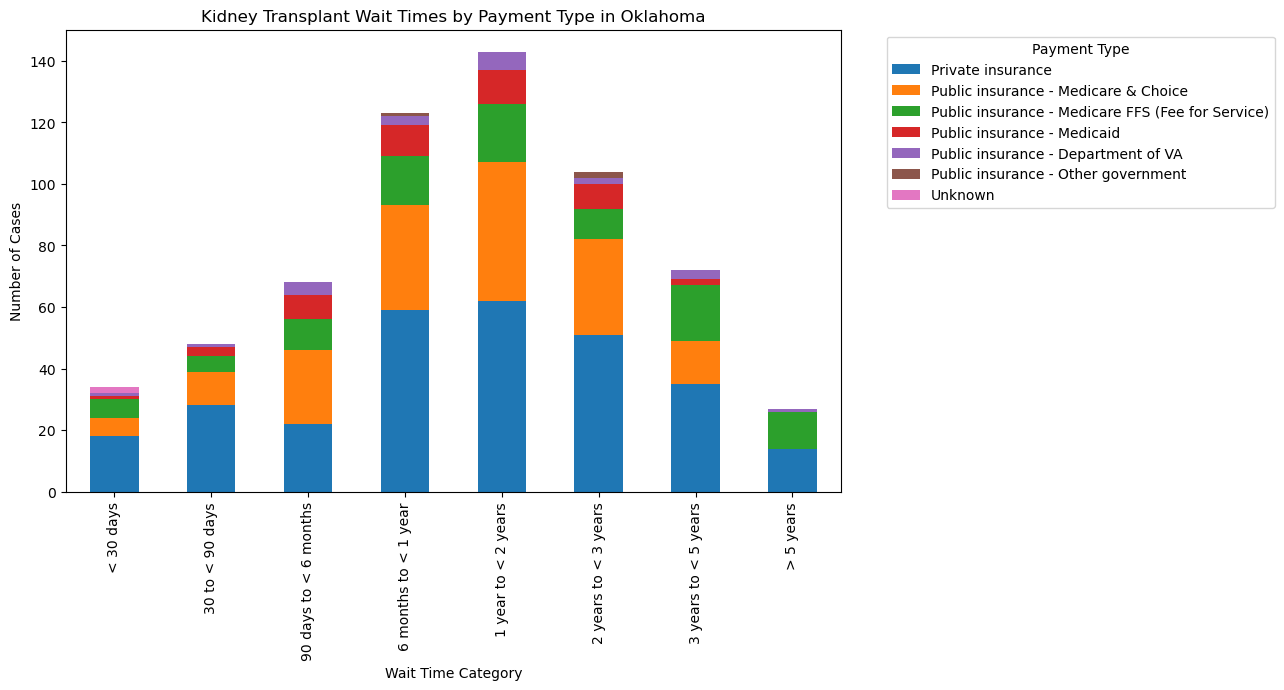

In [30]:
# Plot above on a bar chart
# Set Payment type as the index
payment_data_for_plot = ok_payment_wait.set_index("Payment type")

# Transpose the DataFrame for easier plotting
payment_data_for_plot = payment_data_for_plot.transpose()

# Plot the bar chart
payment_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Payment Type in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Payment Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Summary statistics


In [ ]:
# Hypothesis testing

## Wait time by ethnicity in Oklahoma 

In [33]:
# Total for each ethnicity in Oklahoma

# Total of totals = 599 which is more than the 597 total Oklahoma candidates? Was getting errors on H due to ethnicity
#   type not existing for Oklahoma

ok_ethnicity_type_A = ok_totals1.loc[ok_totals1["Ethnicity"] == "White, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_B = ok_totals1.loc[ok_totals1["Ethnicity"] == "Black, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_C = ok_totals1.loc[ok_totals1["Ethnicity"] == "Hispanic/Latino"]["Total"].values[0]
ok_ethnicity_type_D = ok_totals1.loc[ok_totals1["Ethnicity"] == "Asian, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_E = ok_totals1.loc[ok_totals1["Ethnicity"] == "Multiracial, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_F = ok_totals1.loc[ok_totals1["Ethnicity"] == "American Indian/Alaska Native, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_G = ok_totals1.loc[ok_totals1["Ethnicity"] == "Pacific Islander, Non-Hispanic"]["Total"].values[0]
#ok_ethnicity_type_H = ok_totals1.loc[ok_totals1["Ethnicity"] == "Unknown"]["Total"].values[0]

print(ok_ethnicity_type_A)
print(ok_ethnicity_type_B)
print(ok_ethnicity_type_C)
print(ok_ethnicity_type_D)
print(ok_ethnicity_type_E)
print(ok_ethnicity_type_F)
print(ok_ethnicity_type_G)
#print(ok_ethnicity_type_H)

304
113
65
27
18
68
4


In [35]:
# Creating ethnicity vs wait time dataframe

ok_ethnicity_wait = pd.DataFrame(ok_totals1[["Ethnicity","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_ethnicity_wait

,Ethnicity,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1068,"White, Non-Hispanic",19,25,35,63,77,55,35,11
1075,"Black, Non-Hispanic",5,6,15,22,25,16,18,9
1077,"American Indian/Alaska Native, Non-Hispanic",2,5,6,15,19,12,6,3
1079,Hispanic/Latino,5,6,6,15,11,13,8,3
1082,"Asian, Non-Hispanic",1,4,3,6,8,2,2,1
1083,"Multiracial, Non-Hispanic",1,2,3,2,1,7,2,0
1086,"Pacific Islander, Non-Hispanic",0,0,0,1,2,0,1,0


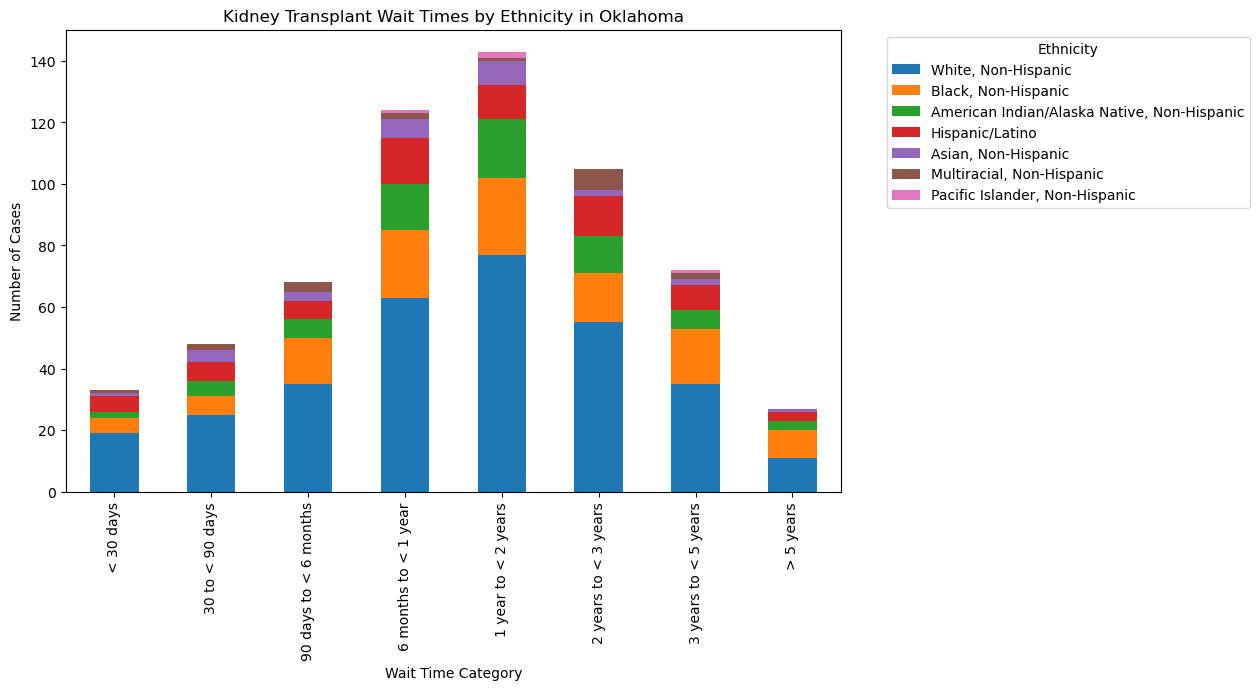

In [36]:
# Plot above on a bar chart

# Set Ethnicity as the index
ethnicity_data_for_plot = ok_ethnicity_wait.set_index("Ethnicity")

# Transpose the DataFrame for easier plotting
ethnicity_data_for_plot = ethnicity_data_for_plot.transpose()

# Plot the bar chart
ethnicity_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Ethnicity in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Summary statistics


In [ ]:
# Hypothesis testing

## Wait time by age group in Oklahoma 

In [40]:
# Total for each age group in Oklahoma

# Was getting errors on A and C due to age group not existing for Oklahoma

#ok_age_group_A = ok_totals1.loc[ok_totals1["Age"] == "< 1 Year"]["Total"].values[0]
ok_age_group_B = ok_totals1.loc[ok_totals1["Age"] == "1-5 Years"]["Total"].values[0]
#ok_age_group_C = ok_totals1.loc[ok_totals1["Age"] == "6-10 Years"]["Total"].values[0]
ok_age_group_D = ok_totals1.loc[ok_totals1["Age"] == "11-17 Years"]["Total"].values[0]
ok_age_group_E = ok_totals1.loc[ok_totals1["Age"] == "18-34 Years"]["Total"].values[0]
ok_age_group_F = ok_totals1.loc[ok_totals1["Age"] == "35-49 Years"]["Total"].values[0]
ok_age_group_G = ok_totals1.loc[ok_totals1["Age"] == "50-64 Years"]["Total"].values[0]
ok_age_group_H = ok_totals1.loc[ok_totals1["Age"] == "65 +"]["Total"].values[0]

#print(ok_age_group_A)
print(ok_age_group_B)
#print(ok_age_group_C)
print(ok_age_group_D)
print(ok_age_group_E)
print(ok_age_group_F)
print(ok_age_group_G)
print(ok_age_group_H)

6
2
63
129
247
150


In [41]:
# Creating age vs wait time dataframe

ok_age_wait = pd.DataFrame(ok_totals1[["Age","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_age_wait

,Age,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1070,50-64 Years,12,23,39,47,61,40,28,10
1073,65 +,8,7,13,33,37,28,21,7
1074,35-49 Years,8,10,7,30,29,22,15,10
1080,18-34 Years,3,6,9,13,15,11,8,0
1085,1-5 Years,2,1,0,0,1,2,0,0
1090,11-17 Years,0,1,0,0,0,1,0,0


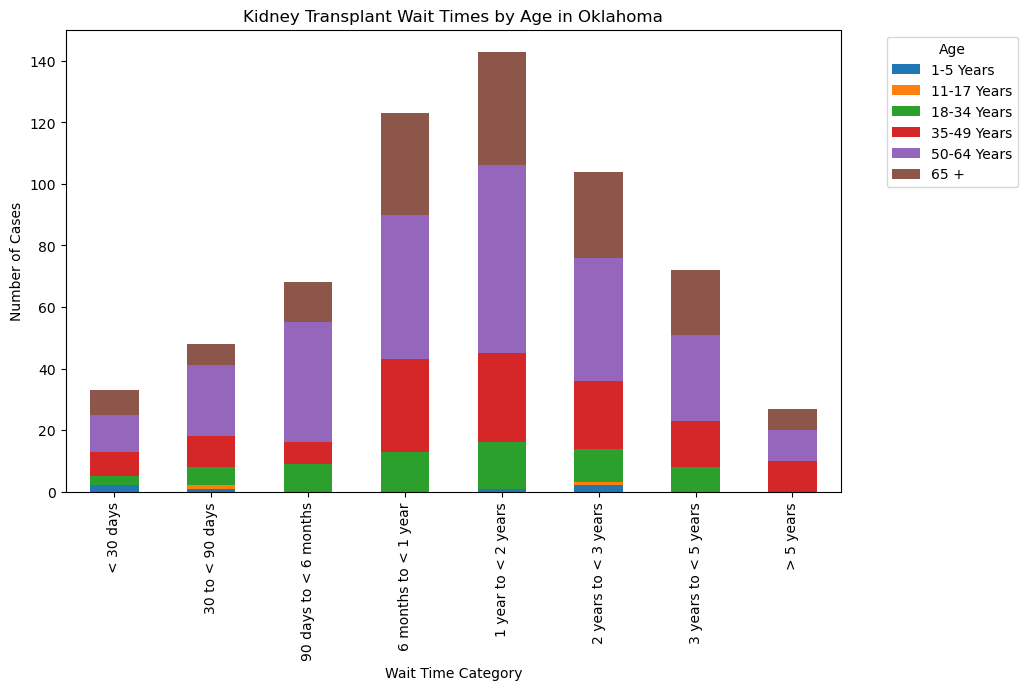

In [43]:
# Plot above on a bar chart
# Set 'Age' as the index
age_data_for_plot = ok_age_wait.set_index("Age")

# Specify the desired order of ages
ordered_ages = ["1-5 Years", "11-17 Years", "18-34 Years", "35-49 Years", "50-64 Years", "65 +"]

# Reorder the rows based on the desired order
age_data_for_plot = age_data_for_plot.loc[ordered_ages]

# Transpose the DataFrame for easier plotting
age_data_for_plot = age_data_for_plot.transpose()

# Plot the bar chart
age_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Age in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Summary statistics

In [ ]:
# Hypothesis testing